In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from nltk.stem.porter import *
from wordcloud import WordCloud
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import tweepy
import re
import matplotlib.pyplot as plt
import json
import nltk
from nltk.corpus import stopwords

In [2]:
pd.set_option('display.max_colwidth', -1)

In [3]:
#variables that contain user credentials to access twitter API
access_token="1082254724240412672-GfrS5YoCorMxngdZ7Jwt44jK6y6fpu"
access_token_secret="lnc4TVgZY8S2sfQpno5hui4zo6DavdFHYPNBep8o1itnN"
consumer_key="veM0efUEak4cvFxxh0U0Ac9KH"
consumer_secret="sB8vRUnZZok6BEml6Yoi7BuoiaYkqXuPePoqJTbLThSKcEvgKc"

In [4]:
key = OAuthHandler(consumer_key, consumer_secret)
key.set_access_token(access_token, access_token_secret)
api = tweepy.API(key)

In [6]:
query = "amazon"
searched_tweets = tweepy.Cursor(api.search, q=query, count=10, include_entities=True,tweet_mode='extended')
tweets = []
for s in searched_tweets.items():
    temp_data = [s.created_at,s.favorite_count,s.retweet_count,s.full_text]
    tweets.append(temp_data)
    


TweepError: Twitter error response: status code = 429

In [7]:
df = pd.DataFrame.from_records(tweets)

In [8]:
df.columns = ['created_at','favourite_count','retweet_count','text']

In [9]:
df

,created_at,favourite_count,retweet_count,text
0,2019-05-02 14:13:05,0,196,"RT @Deal_Trendz: #Giveaway alert! 🚨\n\nWe’re giving away a #Amazon Gift Card worth ₹1,000\n\nTag 5 of your friends, RT this Tweet and Must be a…"
1,2019-05-02 14:13:05,0,1724,"RT @LIVECO_official: ／\nLIVECOリリース記念🎉\n＼\n\nサービスリリースを記念して、\nAmazonギフト券2,000円分を\n期間中【毎日】5名様にプレゼント🎁\n\n🌟応募方法🌟\n①@LIVECO_official をフォロー\n②この投稿を【5/2(木)中】…"
2,2019-05-02 14:13:05,0,37670,"RT @monst_campaign: BLEACH×モンストコラボまで後5日⚔\nその場で当たる!卍解動画RTキャンペーン開催!\nAmazonギフト券2,000円分当たる✨\n5/2から引ける卍解くじのKWも公開!\n①@monst_campaignをフォロー&amp;RT\n②↓をタップ＆…"
3,2019-05-02 14:13:04,0,31819,"RT @monst_campaign: BLEACH×モンストコラボまで後1日⚔\nその場で当たる!卍解動画RTキャンペーン開催!\nAmazonギフト券2,000円分当たる✨\n5/2から引ける卍解くじのKWも公開!\n①@monst_campaignをフォロー&amp;RT\n②↓をタップ＆…"
4,2019-05-02 14:13:04,0,1391,RT @mikado_udai: 🎁平成の余り物でプレゼント企画🎁\nAmazonギフトカード1500円\n当選者【2名】\n\n参加条件\n【RTとフォロー】\n\n〆切\n【5月1日 21時】\n\n令和も皆さん宜しくお願いします！
5,2019-05-02 14:13:04,0,0,How to get free amazon gift card. Amazon free gift card https://t.co/5fp3BVCQpj via @YouTube
6,2019-05-02 14:13:03,0,0,(5/2 1時) Amazon アーティスト別 売れ筋ランキング10位 Jロックマガジン『バンドスコア B’z GREEN 楽譜集 (Official Band Score)』\nhttps://t.co/0uVqDueV7X
7,2019-05-02 14:13:03,0,0,副代表野村俊幸の新刊が発売されました。カナリアたちの警鐘 不登校・ひきこもり・いじめ・体罰へはどのように対処したらよいか https://t.co/2ZUJlpb7AB #函館 #hakodate #道南
8,2019-05-02 14:13:03,0,350,RT @okanenotsubo: 【🎁ほぼ毎日企画🎁 174，175日目】\nAmazonギフト券100円分\n\n⭐️応募方法⭐️\nフォロー&amp;リツイート&amp;固定ツイートのリツイート\n\n⭐️締め切り⭐️\n明日の24時\n\nプレンゼント実績はいいねから確認可能\nサイト登録等は無し\n\nリプ…
9,2019-05-02 14:13:03,0,230,RT @zoknd: 【速報】Amazonプライムビデオ見放題にクラシックアニメがさらに追加\n\nベティ・ブープ https://t.co/VAgFkB2JdZ\nドルーピー＆テックス・アヴェリー https://t.co/NFHNMsOw7x\nポパイ https://t.co/F…


In [10]:
df1=df.sort_values(['retweet_count'],ascending=[False])
df1.head(10)

,created_at,favourite_count,retweet_count,text
1093,2019-05-02 14:09:22,0,37676,"RT @monst_campaign: BLEACH×モンストコラボまで後5日⚔\nその場で当たる!卍解動画RTキャンペーン開催!\nAmazonギフト券2,000円分当たる✨\n5/2から引ける卍解くじのKWも公開!\n①@monst_campaignをフォロー&amp;RT\n②↓をタップ＆…"
690,2019-05-02 14:10:46,0,37675,"RT @monst_campaign: BLEACH×モンストコラボまで後5日⚔\nその場で当たる!卍解動画RTキャンペーン開催!\nAmazonギフト券2,000円分当たる✨\n5/2から引ける卍解くじのKWも公開!\n①@monst_campaignをフォロー&amp;RT\n②↓をタップ＆…"
635,2019-05-02 14:10:58,0,37674,"RT @monst_campaign: BLEACH×モンストコラボまで後5日⚔\nその場で当たる!卍解動画RTキャンペーン開催!\nAmazonギフト券2,000円分当たる✨\n5/2から引ける卍解くじのKWも公開!\n①@monst_campaignをフォロー&amp;RT\n②↓をタップ＆…"
460,2019-05-02 14:11:36,0,37673,"RT @monst_campaign: BLEACH×モンストコラボまで後5日⚔\nその場で当たる!卍解動画RTキャンペーン開催!\nAmazonギフト券2,000円分当たる✨\n5/2から引ける卍解くじのKWも公開!\n①@monst_campaignをフォロー&amp;RT\n②↓をタップ＆…"
276,2019-05-02 14:12:15,0,37672,"RT @monst_campaign: BLEACH×モンストコラボまで後5日⚔\nその場で当たる!卍解動画RTキャンペーン開催!\nAmazonギフト券2,000円分当たる✨\n5/2から引ける卍解くじのKWも公開!\n①@monst_campaignをフォロー&amp;RT\n②↓をタップ＆…"
186,2019-05-02 14:12:31,0,37671,"RT @monst_campaign: BLEACH×モンストコラボまで後5日⚔\nその場で当たる!卍解動画RTキャンペーン開催!\nAmazonギフト券2,000円分当たる✨\n5/2から引ける卍解くじのKWも公開!\n①@monst_campaignをフォロー&amp;RT\n②↓をタップ＆…"
2,2019-05-02 14:13:05,0,37670,"RT @monst_campaign: BLEACH×モンストコラボまで後5日⚔\nその場で当たる!卍解動画RTキャンペーン開催!\nAmazonギフト券2,000円分当たる✨\n5/2から引ける卍解くじのKWも公開!\n①@monst_campaignをフォロー&amp;RT\n②↓をタップ＆…"
1458,2019-05-02 14:08:00,0,31849,"RT @monst_campaign: BLEACH×モンストコラボまで後1日⚔\nその場で当たる!卍解動画RTキャンペーン開催!\nAmazonギフト券2,000円分当たる✨\n5/2から引ける卍解くじのKWも公開!\n①@monst_campaignをフォロー&amp;RT\n②↓をタップ＆…"
1381,2019-05-02 14:08:14,0,31847,"RT @monst_campaign: BLEACH×モンストコラボまで後1日⚔\nその場で当たる!卍解動画RTキャンペーン開催!\nAmazonギフト券2,000円分当たる✨\n5/2から引ける卍解くじのKWも公開!\n①@monst_campaignをフォロー&amp;RT\n②↓をタップ＆…"
1277,2019-05-02 14:08:39,0,31841,"RT @monst_campaign: BLEACH×モンストコラボまで後1日⚔\nその場で当たる!卍解動画RTキャンペーン開催!\nAmazonギフト券2,000円分当たる✨\n5/2から引ける卍解くじのKWも公開!\n①@monst_campaignをフォロー&amp;RT\n②↓をタップ＆…"


In [11]:
df2=df.sort_values(['created_at'],ascending=[False])
df2.max

<bound method DataFrame.max of               created_at  favourite_count  retweet_count  \
0    2019-05-02 14:13:05  0                196             
2    2019-05-02 14:13:05  0                37670           
1    2019-05-02 14:13:05  0                1724            
3    2019-05-02 14:13:04  0                31819           
5    2019-05-02 14:13:04  0                0               
4    2019-05-02 14:13:04  0                1391            
6    2019-05-02 14:13:03  0                0               
8    2019-05-02 14:13:03  0                350             
9    2019-05-02 14:13:03  0                230             
10   2019-05-02 14:13:03  0                8185            
11   2019-05-02 14:13:03  0                0               
7    2019-05-02 14:13:03  0                0               
17   2019-05-02 14:13:02  0                23158           
20   2019-05-02 14:13:02  0                3833            
19   2019-05-02 14:13:02  0                0               
18   2019

# Text Preprocessing

In [12]:
df.drop_duplicates(['text'],keep='last',inplace=True)

In [13]:
df.head()

,created_at,favourite_count,retweet_count,text
4,2019-05-02 14:13:04,0,1391,RT @mikado_udai: 🎁平成の余り物でプレゼント企画🎁\nAmazonギフトカード1500円\n当選者【2名】\n\n参加条件\n【RTとフォロー】\n\n〆切\n【5月1日 21時】\n\n令和も皆さん宜しくお願いします！
5,2019-05-02 14:13:04,0,0,How to get free amazon gift card. Amazon free gift card https://t.co/5fp3BVCQpj via @YouTube
6,2019-05-02 14:13:03,0,0,(5/2 1時) Amazon アーティスト別 売れ筋ランキング10位 Jロックマガジン『バンドスコア B’z GREEN 楽譜集 (Official Band Score)』\nhttps://t.co/0uVqDueV7X
7,2019-05-02 14:13:03,0,0,副代表野村俊幸の新刊が発売されました。カナリアたちの警鐘 不登校・ひきこもり・いじめ・体罰へはどのように対処したらよいか https://t.co/2ZUJlpb7AB #函館 #hakodate #道南
9,2019-05-02 14:13:03,0,230,RT @zoknd: 【速報】Amazonプライムビデオ見放題にクラシックアニメがさらに追加\n\nベティ・ブープ https://t.co/VAgFkB2JdZ\nドルーピー＆テックス・アヴェリー https://t.co/NFHNMsOw7x\nポパイ https://t.co/F…


In [14]:
stemmer = PorterStemmer()
def cleanse(text):
    remove_at_symbols = re.sub('@[\w]+',' ',text)
    remove_hyper_links = re.sub('https://\S+',' ',remove_at_symbols)
    #keep_alpha_num = re.sub('[^A-Za-z0-9]+',' ',remove_hyper_links)
    #replace_spaces = re.sub('[ ]+',' ',keep_alpha_num)
    #clean_text = replace_spaces.lower()
    return remove_hyper_links

In [15]:
df['clean'] = df['text'].apply(cleanse)

In [16]:
df.head()

,created_at,favourite_count,retweet_count,text,clean
4,2019-05-02 14:13:04,0,1391,RT @mikado_udai: 🎁平成の余り物でプレゼント企画🎁\nAmazonギフトカード1500円\n当選者【2名】\n\n参加条件\n【RTとフォロー】\n\n〆切\n【5月1日 21時】\n\n令和も皆さん宜しくお願いします！,RT : 🎁平成の余り物でプレゼント企画🎁\nAmazonギフトカード1500円\n当選者【2名】\n\n参加条件\n【RTとフォロー】\n\n〆切\n【5月1日 21時】\n\n令和も皆さん宜しくお願いします！
5,2019-05-02 14:13:04,0,0,How to get free amazon gift card. Amazon free gift card https://t.co/5fp3BVCQpj via @YouTube,How to get free amazon gift card. Amazon free gift card via
6,2019-05-02 14:13:03,0,0,(5/2 1時) Amazon アーティスト別 売れ筋ランキング10位 Jロックマガジン『バンドスコア B’z GREEN 楽譜集 (Official Band Score)』\nhttps://t.co/0uVqDueV7X,(5/2 1時) Amazon アーティスト別 売れ筋ランキング10位 Jロックマガジン『バンドスコア B’z GREEN 楽譜集 (Official Band Score)』\n
7,2019-05-02 14:13:03,0,0,副代表野村俊幸の新刊が発売されました。カナリアたちの警鐘 不登校・ひきこもり・いじめ・体罰へはどのように対処したらよいか https://t.co/2ZUJlpb7AB #函館 #hakodate #道南,副代表野村俊幸の新刊が発売されました。カナリアたちの警鐘 不登校・ひきこもり・いじめ・体罰へはどのように対処したらよいか #函館 #hakodate #道南
9,2019-05-02 14:13:03,0,230,RT @zoknd: 【速報】Amazonプライムビデオ見放題にクラシックアニメがさらに追加\n\nベティ・ブープ https://t.co/VAgFkB2JdZ\nドルーピー＆テックス・アヴェリー https://t.co/NFHNMsOw7x\nポパイ https://t.co/F…,RT : 【速報】Amazonプライムビデオ見放題にクラシックアニメがさらに追加\n\nベティ・ブープ \nドルーピー＆テックス・アヴェリー \nポパイ


# Tokenization

In [17]:
df['tokens'] = df['clean'].apply(lambda x : x.split(' '))

In [18]:
df.head()

,created_at,favourite_count,retweet_count,text,clean,tokens
4,2019-05-02 14:13:04,0,1391,RT @mikado_udai: 🎁平成の余り物でプレゼント企画🎁\nAmazonギフトカード1500円\n当選者【2名】\n\n参加条件\n【RTとフォロー】\n\n〆切\n【5月1日 21時】\n\n令和も皆さん宜しくお願いします！,RT : 🎁平成の余り物でプレゼント企画🎁\nAmazonギフトカード1500円\n当選者【2名】\n\n参加条件\n【RTとフォロー】\n\n〆切\n【5月1日 21時】\n\n令和も皆さん宜しくお願いします！,"[RT, , :, 🎁平成の余り物でプレゼント企画🎁\nAmazonギフトカード1500円\n当選者【2名】\n\n参加条件\n【RTとフォロー】\n\n〆切\n【5月1日, 21時】\n\n令和も皆さん宜しくお願いします！]"
5,2019-05-02 14:13:04,0,0,How to get free amazon gift card. Amazon free gift card https://t.co/5fp3BVCQpj via @YouTube,How to get free amazon gift card. Amazon free gift card via,"[How, to, get, free, amazon, gift, card., Amazon, free, gift, card, , , via, , ]"
6,2019-05-02 14:13:03,0,0,(5/2 1時) Amazon アーティスト別 売れ筋ランキング10位 Jロックマガジン『バンドスコア B’z GREEN 楽譜集 (Official Band Score)』\nhttps://t.co/0uVqDueV7X,(5/2 1時) Amazon アーティスト別 売れ筋ランキング10位 Jロックマガジン『バンドスコア B’z GREEN 楽譜集 (Official Band Score)』\n,"[(5/2, 1時), Amazon, アーティスト別, 売れ筋ランキング10位, Jロックマガジン『バンドスコア, B’z, GREEN, 楽譜集, (Official, Band, Score)』\n, ]"
7,2019-05-02 14:13:03,0,0,副代表野村俊幸の新刊が発売されました。カナリアたちの警鐘 不登校・ひきこもり・いじめ・体罰へはどのように対処したらよいか https://t.co/2ZUJlpb7AB #函館 #hakodate #道南,副代表野村俊幸の新刊が発売されました。カナリアたちの警鐘 不登校・ひきこもり・いじめ・体罰へはどのように対処したらよいか #函館 #hakodate #道南,"[副代表野村俊幸の新刊が発売されました。カナリアたちの警鐘, 不登校・ひきこもり・いじめ・体罰へはどのように対処したらよいか, , , #函館, #hakodate, #道南]"
9,2019-05-02 14:13:03,0,230,RT @zoknd: 【速報】Amazonプライムビデオ見放題にクラシックアニメがさらに追加\n\nベティ・ブープ https://t.co/VAgFkB2JdZ\nドルーピー＆テックス・アヴェリー https://t.co/NFHNMsOw7x\nポパイ https://t.co/F…,RT : 【速報】Amazonプライムビデオ見放題にクラシックアニメがさらに追加\n\nベティ・ブープ \nドルーピー＆テックス・アヴェリー \nポパイ,"[RT, , :, 【速報】Amazonプライムビデオ見放題にクラシックアニメがさらに追加\n\nベティ・ブープ, , \nドルーピー＆テックス・アヴェリー, , \nポパイ, , ]"


# Stemming

In [19]:
def stemming(tokens):
    stemmed = [stemmer.stem(token) for token in tokens]
    return stemmed
df['stemmed'] = df['tokens'].apply(stemming)

In [20]:
df.head()

,created_at,favourite_count,retweet_count,text,clean,tokens,stemmed
4,2019-05-02 14:13:04,0,1391,RT @mikado_udai: 🎁平成の余り物でプレゼント企画🎁\nAmazonギフトカード1500円\n当選者【2名】\n\n参加条件\n【RTとフォロー】\n\n〆切\n【5月1日 21時】\n\n令和も皆さん宜しくお願いします！,RT : 🎁平成の余り物でプレゼント企画🎁\nAmazonギフトカード1500円\n当選者【2名】\n\n参加条件\n【RTとフォロー】\n\n〆切\n【5月1日 21時】\n\n令和も皆さん宜しくお願いします！,"[RT, , :, 🎁平成の余り物でプレゼント企画🎁\nAmazonギフトカード1500円\n当選者【2名】\n\n参加条件\n【RTとフォロー】\n\n〆切\n【5月1日, 21時】\n\n令和も皆さん宜しくお願いします！]","[RT, , :, 🎁平成の余り物でプレゼント企画🎁\namazonギフトカード1500円\n当選者【2名】\n\n参加条件\n【rtとフォロー】\n\n〆切\n【5月1日, 21時】\n\n令和も皆さん宜しくお願いします！]"
5,2019-05-02 14:13:04,0,0,How to get free amazon gift card. Amazon free gift card https://t.co/5fp3BVCQpj via @YouTube,How to get free amazon gift card. Amazon free gift card via,"[How, to, get, free, amazon, gift, card., Amazon, free, gift, card, , , via, , ]","[how, to, get, free, amazon, gift, card., amazon, free, gift, card, , , via, , ]"
6,2019-05-02 14:13:03,0,0,(5/2 1時) Amazon アーティスト別 売れ筋ランキング10位 Jロックマガジン『バンドスコア B’z GREEN 楽譜集 (Official Band Score)』\nhttps://t.co/0uVqDueV7X,(5/2 1時) Amazon アーティスト別 売れ筋ランキング10位 Jロックマガジン『バンドスコア B’z GREEN 楽譜集 (Official Band Score)』\n,"[(5/2, 1時), Amazon, アーティスト別, 売れ筋ランキング10位, Jロックマガジン『バンドスコア, B’z, GREEN, 楽譜集, (Official, Band, Score)』\n, ]","[(5/2, 1時), amazon, アーティスト別, 売れ筋ランキング10位, jロックマガジン『バンドスコア, b’z, green, 楽譜集, (offici, band, score)』\n, ]"
7,2019-05-02 14:13:03,0,0,副代表野村俊幸の新刊が発売されました。カナリアたちの警鐘 不登校・ひきこもり・いじめ・体罰へはどのように対処したらよいか https://t.co/2ZUJlpb7AB #函館 #hakodate #道南,副代表野村俊幸の新刊が発売されました。カナリアたちの警鐘 不登校・ひきこもり・いじめ・体罰へはどのように対処したらよいか #函館 #hakodate #道南,"[副代表野村俊幸の新刊が発売されました。カナリアたちの警鐘, 不登校・ひきこもり・いじめ・体罰へはどのように対処したらよいか, , , #函館, #hakodate, #道南]","[副代表野村俊幸の新刊が発売されました。カナリアたちの警鐘, 不登校・ひきこもり・いじめ・体罰へはどのように対処したらよいか, , , #函館, #hakod, #道南]"
9,2019-05-02 14:13:03,0,230,RT @zoknd: 【速報】Amazonプライムビデオ見放題にクラシックアニメがさらに追加\n\nベティ・ブープ https://t.co/VAgFkB2JdZ\nドルーピー＆テックス・アヴェリー https://t.co/NFHNMsOw7x\nポパイ https://t.co/F…,RT : 【速報】Amazonプライムビデオ見放題にクラシックアニメがさらに追加\n\nベティ・ブープ \nドルーピー＆テックス・アヴェリー \nポパイ,"[RT, , :, 【速報】Amazonプライムビデオ見放題にクラシックアニメがさらに追加\n\nベティ・ブープ, , \nドルーピー＆テックス・アヴェリー, , \nポパイ, , ]","[RT, , :, 【速報】amazonプライムビデオ見放題にクラシックアニメがさらに追加\n\nベティ・ブープ, , \nドルーピー＆テックス・アヴェリー, , \nポパイ, , ]"


# More Cleansing

In [21]:
def cleanse_tokens(tokens):
    keep_alpha_num = [re.sub('[^A-Za-z0-9]',' ',token) for token in tokens]
    lower_case = [token.lower() for token in keep_alpha_num]
    length = [token if len(token) > 3 else None for token in lower_case]
    replace_none = list(filter(lambda x : x != None,length))
    
    return replace_none
    
df['clean_tokens'] = df['stemmed'].apply(cleanse_tokens)

In [22]:
df[['clean_tokens']].head()

,clean_tokens
4,"[ amazon 1500 2 rt 5 1 , 21 ]"
5,"[free, amazon, gift, card , amazon, free, gift, card]"
6,"[ 5 2, amazon, , 10 , j , green, offici, band, score ]"
7,"[ , , hakod]"
9,"[ amazon , , ]"


In [31]:
def remove_stop_words(tokens):
    
    stop_words = set(stopwords.words('english'))
    stop_words.add('flipkart')
    stop_words.add('amazon')
    stop_words.add('amazonindia')
    stop_words.add('snapdeal')
    stop_words.add('product')
    stop_words.add('custom')
    stop_words.add('customer')
    stop_words.add('india')
    tokens_list = [token.strip() for token in tokens if token.strip() not in stop_words]
    tokens_string = ' '.join(tokens_list)
    return tokens_string

df['tokens']=df['tokens'].apply(remove_stop_words)

In [32]:
df['final'] = df['clean_tokens'].apply(remove_stop_words)

In [33]:
all_words = ' '.join(df['final'])

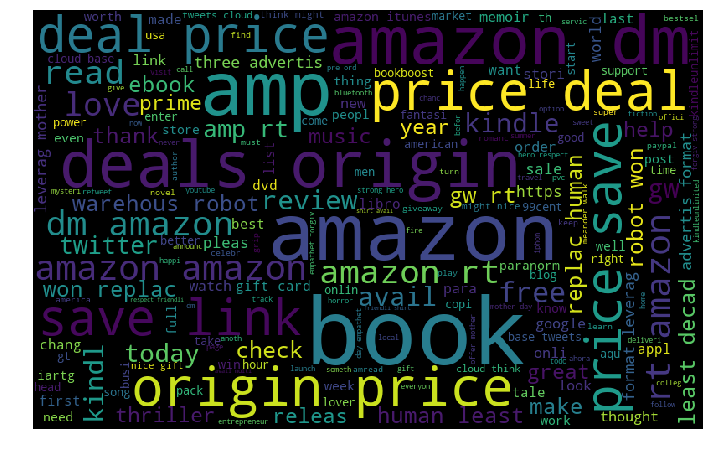

In [34]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
%matplotlib inline

In [ ]:
df.head()

In [ ]:
import textblob


In [ ]:
def get_sentiment(text):
    blob=textblob.TextBlob(text)
    sent=blob.sentiment[0]
    return sent

In [ ]:
df['sentiment']=df['text'].apply(get_sentiment)

In [ ]:
df.head(10)

In [ ]:
tweets = tweepy.Cursor(api.search, q=searchTerm).items(noOfSearchTerms)

positive = 0
negative = 0
neutral = 0
polarity = 0

for tweet in tweets:
	#print(tweet.text)
	analysis = TextBlob(tweet.text)
	polarity += analysis.sentiment.polarity
	
	if(analysis.sentiment.polarity == 0):
		neutral += 1
	elif(analysis.sentiment.polarity < 0.00):
		negative += 1
	elif(analysis.sentiment.polarity > 0.00):
		positive += 1
positive = percentage(positive,noOfSearchTerms)
negative = percentage(negative,noOfSearchTerms)
neutral = percentage(neutral,noOfSearchTerms)
polarity = percentage(polarity,noOfSearchTerms)

positive = format(positive, '.2f')
negative = format(negative, '.2f')
neutral = format(neutral, '.2f')